# The Basics of algorithms

In [1]:
from IPython.display import HTML
import sys

A language has 3 parts:

- expressions and statements: how to structure simple computations
- means of combination: how to structure complex computations
- means of abstraction: how to build complex units

## Means of combination: the evaluation of functions

In [2]:
#nested call expressions
max(min(1,2), min(100,-3))

1

To evaluate any expression:

1. evaluate the operator and operand subexpressions
2. Apply the function that is the value of the operator subexpression to the arguments that are the values of the operand subexpressions.

The first rule means that we must first evaluate other sub-expressions. Thus the evaluation procedure is recursive in nature.

We'll have much more about the complex evaluation of the combinations of functions later...


## Evaluating a process

Notice that a function is a pattern for the local progress of some process. Given a set of functions making up a process, we'd like to be able to characterize the overall behaviour of a process. This is a difficult analysis to do in general.

But its important, as it tells us the performance of our code: which functions ought we speed up, and which we do not need to bother with. To build ourselves up for this, we should learn how to analyse how a function behaves in its usage of computational resources, both space and time.

### Recursive functions

We start with trying to understand recursive functions.

Lets look at the factorial function

In [3]:
def factorial_recursive(n):#notice NO local variables
    if n==1:
        return 1
    return n*factorial_recursive(n-1)

In [4]:
factorial_recursive(3)

6

from SICP:
>Recursive functions can rely more heavily on the interpreter itself, by storing the state of the computation as part of the expression tree and environment, rather than explicitly using names in the local frame. For this reason, recursive functions are often easier to define, because we do not need to try to determine the local state that must be maintained across iterations. On the other hand, learning to recognize the computational processes evolved by recursive functions can require some practice.

In [2]:
from IPython.display import HTML
HTML('<iframe width="800" height="500" frameborder="0" src="http://pythontutor.com/iframe-embed.html#code=def+factorial_recursive(n%29%3A%0A++++if+n%3D%3D1%3A%0A++++++++return+1%0A++++return+n*factorial_recursive(n-1%29%0A%09++++%0Aa+%3D+factorial_recursive(3%29%0Aprint(a%29&origin=opt-frontend.js&cumulative=false&heapPrimitives=false&textReferences=false&py=3&rawInputLstJSON=%5B%5D&curInstr=0&codeDivWidth=350&codeDivHeight=400"> </iframe>')

#### Factorial, iteratively

...or when, one thing follows another...In this case we explicitly use state in the local frame.

In [6]:
def factorial_iterative(n):
        total, k = 1, 1
        while k <= n:
            total = total * k
            k = k + 1
        return total

In [7]:
factorial_iterative(3)

6

In [3]:
HTML('<iframe width="800" height="500" frameborder="0" src="http://pythontutor.com/iframe-embed.html#code=def+factorial_iterative(n%29%3A%0A++++++++total,+k+%3D+1,+1%0A++++++++while+k+%3C%3D+n%3A%0A++++++++++++total,+k+%3D+total+*+k,+k+%2B+1%0A++++++++return+total%0A++++++++%0Afactorial_iterative(3%29&origin=opt-frontend.js&cumulative=true&heapPrimitives=false&textReferences=false&py=3&rawInputLstJSON=%5B%5D&curInstr=0&codeDivWidth=350&codeDivHeight=400"> </iframe>')

#### The Call Stack, time, and space

In the recursive call, you create a new frame for each function call. Thus, while you dont keep track of local state, you must expend resources to maintain an entire frame stack.

The stack answers the question: how does a computer pick up where it left off before a function call. There is a frame for each function call as we have seen, and storage for local variables. Calling a function pushes on a frame at the top of the **call stack**, while returning from a function deletes the frame. 
Wikipedia has a fairly good article on this:

https://en.wikipedia.org/wiki/Call_stack

If we try and add more than `sys.getrecursionlimit()` calls on the stack, we'll get a "Stack Overflow" as a "RuntimeError"

In [9]:
sys.getrecursionlimit()

1000

In [10]:
def something_recursive(n):#notice NO local variables
    if n==1:
        return 1
    return n + something_recursive(n-1)
something_recursive(900)

405450

>a function is a pattern for the local progress of some process


### The Model of the computer and O(n)

We ought to formalize the compute and space needs of an algorithm. Consider the iterative factorial finder (1 or 2). There is a loop over n numbers. Informally, if multiplication is an O(1) operation: ie each multiplication takes constant time, you have to do n of these, so then finding the factorial is an O(n) operation.

The $O(n)$ notation means: if an algorithm is $O(f(n))$ in time, its running time is proportional to **at most** $f(n)$. Thus it is an **upper-bound** we are talking about here. 

But we must make a model to agree on the complexity of our basic operations. 

The model we will use is whats known as the RAM model. We abstract the details of the machine away, and assume a single process not interrupted by context switching or similar

- each simple operation (+, -, \*, =, if, func call) are charged 1
- loops are considered to be O(iterations) where iterations may depend on n
- each memory access takes O(1), with infinite memory, and no worry about disk.

We'll worry about things like cache or disk later...


Here is a table of the most important cases, from the Practice of Programming:

![](oofn.png)



Formally(from skiena):

>$f(n) = O(g(n))$ means c•g(n) is an upper bound on f(n). Thus there exists some constant c such that f(n) is always  $< c•g(n)$, for all $n > n_0$.

>f(n) = $\Omega(g(n))$ means c•g(n) is a lower bound on f(n). Thus there exists some constant c such that f(n) is always $>c•g(n)$, for all $n > n_0$.

>f(n) = $\Theta(g(n))$ means $c_{1}•g(n)$ is an upper bound on f(n) and $c_{2}•g(n)$ is a lower bound on f(n), for all $n>n_0$. Thus there exist constants $c_1$ and $c_2$ such that $f(n)<c_{1}•g(n)$ and $f(n)>c_{2}•g(n)$. This means that g(n) provides a nice, tight bound on f(n).

![](compnot.png)

### Recurrences for the Time Complexity

In general, we can formalize this process in a recursive function by a recurrence relationship:

Say the base case takes time a,

and then assume $T(n) = T(n-1) +b(n)$

Then unroll this and we see that the complexity, defined by the **asymptotic time for the algorithm to complete, as $n \rightarrow \infty$, is :

$$b(n) + b(n-1) + b(n-2) +.....+ b(1) + a$$

The answer to $T(n)$ is generally complex, but if all the b's were equal to a constant, call it b, then we'd have:

$$T(n) = b \times n + a$$ and thus say that the algorithm is of order $O(n$).

#### Factorial

So if multiplication costs b and the return 1 costs a, then in both the iterative and recursive versions, $n!$ takes a cost of $b*n + a$ and thus is O(n)

### Space Complexity

**Space Complexity is asking how much memory you will need.**

What about the space complexity? The iterative algorithms dont create n frames on the stack, rather two local variables, and are thus O(1) space complexity.

The recursive one take n stacks, thus cost `n*something` in space, and and are thus O(n) space complexity. 

### Sequential Search: Best Case, Worst Case, and Average case

![](bestworstaverage.png)

(from skiena)

Consider sequential search through an array or list (there is a difference between the two we will come to later). Currently consider a python list, and the attempt to find a value is done in python by going one by one through the list.


In [27]:
mylist = [1,5,2,7,9,3,6,9,9]
mylist.index(9)

4

The best case scenario is that the item you are searching for is the first thing in the list. Then, search is O(1). The worst case scenario is that it is at the end of the list. Then we are talking about O(n). On average, since there is no reason to suspect any ordering, the probability that the item is found at any index is equal. Then:

$$E(t) = \sum_i p_i t_i = \frac{1}{n}\sum_i i = \frac{n+1}{2}$$

This is order O(n).

Clearly the worse case and average behavior are the ones to know.

What about space complexity? If you were already given the array, then u dont have to set up any intermediate data structures, so its O(1). This is the assumption you should make when you quote the complexity.

On the other hand if you must load from file to memory, you will use up O(n) of memory. In the real world, when you are writing the whole program, you should know that your memory usage will rise linearly with the size of your dataset.

In [23]:
import random, time
trys=20
inputs = [10, 100, 1000, 10000, 100000, 1000000]
outputs = []
for n in inputs:
    listwithints=list(range(n))
    aver = 0.
    for tryit in range(trys):
        int_to_search = random.randrange(n)
        start = time.time()
        listwithints.index(int_to_search)#python index uses linear search
        elapsed = time.time() - start
        aver = aver + elapsed
    outputs.append(float(aver)/trys)



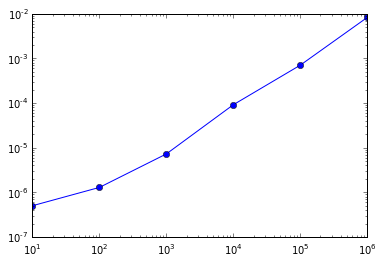

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(inputs, outputs, 'o-')
plt.xscale('log')
plt.yscale('log')

### Selection Sort

(see animation at http://www.cs.armstrong.edu/liang/animation/web/SelectionSort.html)

Basic Idea: swap the current element with the smallest in the remaining part of the array to the right..

In [37]:
def selection_sort(A):
    for i in range(len(A)):
        print("<<<",A)
        min_index = i
        for j in range(i+1, len(A)):
            if A[j] < A[min_index]:
                min_index = j
        A[i], A[min_index] = A[min_index], A[i]
        print(">>>",A)

In [38]:
A=[5,2,1,3,8,6,9]
selection_sort(A)
print(A)

<<< [5, 2, 1, 3, 8, 6, 9]
>>> [1, 2, 5, 3, 8, 6, 9]
<<< [1, 2, 5, 3, 8, 6, 9]
>>> [1, 2, 5, 3, 8, 6, 9]
<<< [1, 2, 5, 3, 8, 6, 9]
>>> [1, 2, 3, 5, 8, 6, 9]
<<< [1, 2, 3, 5, 8, 6, 9]
>>> [1, 2, 3, 5, 8, 6, 9]
<<< [1, 2, 3, 5, 8, 6, 9]
>>> [1, 2, 3, 5, 6, 8, 9]
<<< [1, 2, 3, 5, 6, 8, 9]
>>> [1, 2, 3, 5, 6, 8, 9]
<<< [1, 2, 3, 5, 6, 8, 9]
>>> [1, 2, 3, 5, 6, 8, 9]
[1, 2, 3, 5, 6, 8, 9]


The outer loop goes around $n$ times, the inner $n-i-1$ times. Thus the running time for an input of size n is:

$$T(n) = \sum_{i=0}^{n-1} n -i -1 $$

$$ T(n) = n(n-1) - \frac{n(n-1)}2 - (n-1) \sim O(n^2)$$

Note that as we must still test all elements in the inner loop, the worst case, average, and best case complexities are all the same.

The space complexity again depends on whether you were given the array or not: if so, it is O(1).

Another way to think about this:

We have n terms in the summation for the total time, each of which is bounded by n-1. So $T(n) < n(n-1) = O(n^{2})$

We have n/2 terms each which are bigger than n/2. So we have $T(n) > (n/2)^2 = \Omega(n^2)$

Together, $T(n) = \Theta(n^{2}) $, which if you see the definition is better than just providing an upper bound. 

But often an upper bound, in a worst case scenario, ie worst case O, is what you want to make a decision for what algorithm to use.

In [20]:
%%time
linear_search(l2, 10000)

CPU times: user 985 µs, sys: 1 µs, total: 986 µs
Wall time: 989 µs


10000

### Binary Search

How can we increase this speed? If we are given sorted data we can use **binary search** to do this in O(lg(n)) time.

The idea is simple: look at the middle of the list and compare with desired value. If value is higher its on the right side and we look there, and so on. This is an example of what is called a divide and conquer algorithm.

Animation: http://www.cs.armstrong.edu/liang/animation/web/BinarySearch.html

In [9]:
#there are problems in this code. But, later
def binary_search_simple(da_array, needle):
    rangemin = 0
    rangemax = len(da_array) - 1
    while True:
        midpoint = (rangemin+rangemax)//2 #whats the problem with this
        if da_array[midpoint] > needle:#lower part
            rangemax = midpoint - 1
        elif da_array[midpoint] < needle:
            rangemin = midpoint + 1
        else:
            return midpoint

In [5]:
l2 = range(10000000)

In [6]:
def linear_search(da_array, needle):
    for i, item in enumerate(da_array):
        if item==needle:
            return i
    return -1

In [7]:
%%time
linear_search(l2, 10000)

CPU times: user 951 µs, sys: 8 µs, total: 959 µs
Wall time: 961 µs


10000

In [10]:
%%time
binary_search_simple(l2, 10000)

CPU times: user 15 µs, sys: 0 ns, total: 15 µs
Wall time: 18.1 µs


10000

Binary search order of operation can be understood by setting up a simple recurrence:

T(n) = T(n/2) + c

T(n) = lg(n)*c + d 

which means that Binary search is O(lg(n)) in time. What about space? Once the sorted array is allocated there is no more allocation needed...we just go down the array.

The best case performance is O(1), if we were looking for the median or something close to it.

Binary search can be used in many different places. Examples:

- square root finding bisection method, starting with l=1, and r = n
- generalizes to finding roots of any equation, given a l,r where f(l) < 0 and f(r) > 0
- we can use git bisect to find the commit that introduced a bug